In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
param_name = 'chargeSpeed'
expt_type = 'playfight/with_cover_story/sentiment_analyses/'
rootfile_loc = f'../../data/text_responses/{expt_type}'

In [8]:
df = pd.read_csv(f'{rootfile_loc}/data_with_sentiment_scores.csv', index_col=[0])
df = df.reset_index()
df

,index,subID,stimset_rows,chargeSpeed,responses,movie,trial_num,neg_score,neu_score,pos_score,pos-neg,pos-neu,neg-neu,neu-neg
0,2,24058,96,1.5,talking and exploring the park,e5e05e73-9cd0-4990-8da2-4962e0a03e5d,2,0.008222,0.446902,0.544876,0.536654,0.097974,-0.438680,0.438680
1,0,24075,46,1.5,playing together,50919f52-6a9c-4824-b24f-2f1aebd58e1b,0,0.008245,0.894250,0.097505,0.089260,-0.796744,-0.886004,0.886004
2,6,24017,31,1.5,the dots were gently bumping into each other r...,95aaf072-b6be-4da4-9857-deaf20ab49f2,6,0.008893,0.258820,0.732287,0.723394,0.473467,-0.249927,0.249927
3,1,24026,3,1.5,The dots were coming together in a more friend...,15dfbaca-4429-4c18-90f4-8d4804129e6f,1,0.011655,0.566310,0.422035,0.410380,-0.144275,-0.554655,0.554655
4,3,24083,7,1.5,Walking around before getting called to walk a...,38ad4b16-44e2-4e52-8d02-b23eca73a48d,3,0.011682,0.938487,0.049831,0.038148,-0.888656,-0.926804,0.926804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,4,24000,22,9.0,Hit and run away.,a5228b86-ba0a-42f2-aa38-23b5369f0e56,4,0.340505,0.582922,0.076574,-0.263931,-0.506348,-0.242417,0.242417
701,1,24037,65,9.0,body slamming,5b2465b2-47b6-4cc7-b06f-c362ff7454f8,1,0.405213,0.468791,0.125996,-0.279217,-0.342795,-0.063578,0.063578
702,4,24001,5,9.0,aggressively charging at each other,87da47db-3d5c-48b2-b3f2-123123d766f0,4,0.418659,0.499900,0.081441,-0.337217,-0.418458,-0.081241,0.081241
703,2,24006,52,9.0,running at each other,9f7e489f-4076-4332-b57e-13a42d4c75fd,2,0.435876,0.483708,0.080415,-0.355461,-0.403293,-0.047832,0.047832


In [9]:
sum_sentiments = (df['pos_score'] + df['neg_score'] + df['neu_score'])
sum_sentiments.describe()

count    7.050000e+02
mean     1.000000e+00
std      6.852420e-08
min      9.999998e-01
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
dtype: float64

In [19]:
import matplotlib.pyplot as plt
s=16 # CHANGE FONTSIZE HERE
plt.rc('font', size=s) #controls default text size
plt.rc('axes', titlesize=s) #fontsize of the title
plt.rc('axes', labelsize=s) #fontsize of the x and y labels
plt.rc('xtick', labelsize=s) #fontsize of the x tick labels
plt.rc('ytick', labelsize=s) #fontsize of the y tick labels
plt.rc('legend', fontsize=s) #fontsize of the legend

In [11]:
param_name = 'chargeSpeed'

In [12]:
results_dir = '../../results/text_analysis/pf/with_cover_story/'

In [13]:
# fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(10,5), sharey=True,sharex=True)
# ax = axs[0]

# sns.boxplot(data = df, x = param_name, y = 'neg_score', ax = ax, color='grey')
# sns.stripplot(data = df, x = param_name, y = 'neg_score', ax = ax)
# ax.set_title('Negative score')

# ax = axs[1]
# sns.boxplot(data = df, x = param_name, y = 'pos_score', ax = ax, color='grey')
# sns.stripplot(data = df, x = param_name, y = 'pos_score', ax = ax)
# ax.set_title('Positive score')

# plt.suptitle('Sentiment scores')
# plt.tight_layout()

In [14]:
colors_plot = 'tab:red'

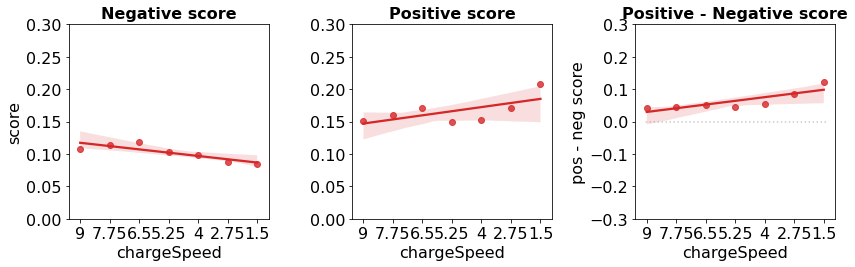

In [22]:
fig,axs = plt.subplots(nrows=1,ncols=3,figsize=(12,4), sharey=False,sharex=True)
ax = axs[0]
sns.regplot(data = df.groupby([param_name]).mean().reset_index(),x = param_name, y='neg_score',  ax=ax, marker = 'o', color=colors_plot)#, legend=False)
ax.set_title('Negative score', fontweight = 'bold')
ax.set_ylabel('score')
ax.set_xticks(np.unique(df[param_name]))
ax.set_ylim(0,.3)
ax.invert_xaxis()

ax = axs[1]
sns.regplot(data = df.groupby([param_name]).mean().reset_index(),x = param_name, y='pos_score', ax=ax,marker = 'o', color=colors_plot)#,legend=False)
ax.set_title('Positive score', fontweight = 'bold')
ax.set_ylabel('')
ax.set_ylim(0,.3)
ax.invert_xaxis()

ax = axs[2]
sns.regplot(data = df.groupby([param_name]).mean().reset_index(),x = param_name, y='pos-neg',  ax=ax,marker = 'o', color=colors_plot)#,legend=False)
ax.set_title('Positive - Negative score', fontweight = 'bold')
ax.set_ylabel('pos - neg score')
ax.set_ylim(-.3,.3)
ax.hlines(0,1.4,9.1,color = 'grey',ls=':',alpha = .4)
ax.set_xticks(np.arange(1.5,9.1,1.25),['1.5','2.75','4','5.25','6.5','7.75','9'])
ax.invert_xaxis()

plt.tight_layout()
plt.savefig(f'{results_dir}/sentiment_analysis_lineplot.png')

In [15]:
pwd

'/Users/f0053cz/Dartmouth College Dropbox/Rekha Sreekumar Varrier/postdoc_Dartmouth/psyanim_behav_paper/version2/scripts_data_for_beh_paper/code/1_text_data'

## Stats

In [16]:
from pymer4.models import Lmer
from pymer4.stats import vif

In [17]:
model = Lmer('neg_score ~ chargeSpeed +  (1|subID) + (1|movie)', data=df) # ff: anglesm rfx: subject ID
model.fit()

Formula: neg_score~chargeSpeed+(1|subID)+(1|movie)

Family: gaussian	 Inference: parametric

Number of observations: 705	 Groups: {'movie': 140.0, 'subID': 102.0}

Log-likelihood: 527.004 	 AIC: -1054.008

Random effects:

                 Name    Var    Std
movie     (Intercept)  0.000  0.006
subID     (Intercept)  0.000  0.015
Residual               0.013  0.112

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),0.081,0.061,0.101,0.010,140.498,7.967,0.00,***
chargeSpeed,0.004,0.001,0.007,0.002,131.781,2.357,0.02,*


In [18]:
model = Lmer('neg_score ~ chargeSpeed +  (1|subID)', data=df) # ff: anglesm rfx: subject ID
model.fit()

Formula: neg_score~chargeSpeed+(1|subID)

Family: gaussian	 Inference: parametric

Number of observations: 705	 Groups: {'subID': 102.0}

Log-likelihood: 526.996 	 AIC: -1053.993

Random effects:

                 Name    Var    Std
subID     (Intercept)  0.000  0.015
Residual               0.013  0.112

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),0.081,0.061,0.101,0.010,683.322,8.015,0.000,***
chargeSpeed,0.004,0.001,0.007,0.002,606.127,2.376,0.018,*


In [19]:
model = Lmer('pos_score ~ chargeSpeed +  (1|subID) + (1|movie)', data=df) # ff: anglesm rfx: subject ID
model.fit()

Formula: pos_score~chargeSpeed+(1|subID)+(1|movie)

Family: gaussian	 Inference: parametric

Number of observations: 705	 Groups: {'movie': 140.0, 'subID': 102.0}

Log-likelihood: 334.980 	 AIC: -669.960

Random effects:

                 Name    Var    Std
movie     (Intercept)  0.000  0.021
subID     (Intercept)  0.003  0.055
Residual               0.020  0.140

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),0.192,0.164,0.22,0.014,139.123,13.456,0.000,***
chargeSpeed,-0.005,-0.009,-0.00,0.002,102.984,-2.169,0.032,*


In [20]:
model = Lmer('pos_score ~ chargeSpeed +  (1|subID)', data=df) # ff: anglesm rfx: subject ID
model.fit()

Formula: pos_score~chargeSpeed+(1|subID)

Family: gaussian	 Inference: parametric

Number of observations: 705	 Groups: {'subID': 102.0}

Log-likelihood: 334.707 	 AIC: -669.414

Random effects:

                 Name    Var    Std
subID     (Intercept)  0.003  0.055
Residual               0.020  0.141

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),0.191,0.164,0.218,0.014,569.833,13.924,0.000,***
chargeSpeed,-0.005,-0.009,-0.001,0.002,604.922,-2.245,0.025,*


## Difference plots

In [21]:
df.rename(columns = {'pos-neg':'pos_neg','pos-neu':'pos_neu','neg-neu':'neg_neu','neu-neg':'neu_neg'},inplace=True)

In [22]:
model = Lmer('pos_neg ~ chargeSpeed +  (1|subID) + (1|movie)', data=df) # ff: anglesm rfx: subject ID
model.fit()

boundary (singular) fit: see ?isSingular 

Formula: pos_neg~chargeSpeed+(1|subID)+(1|movie)

Family: gaussian	 Inference: parametric

Number of observations: 705	 Groups: {'movie': 140.0, 'subID': 102.0}

Log-likelihood: 87.187 	 AIC: -174.374

Random effects:

                 Name    Var    Std
movie     (Intercept)  0.000  0.000
subID     (Intercept)  0.004  0.061
Residual               0.042  0.204

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),0.110,0.073,0.148,0.019,628.647,5.754,0.000,***
chargeSpeed,-0.009,-0.015,-0.003,0.003,605.187,-2.859,0.004,**


In [23]:
model = Lmer('pos_neg ~ chargeSpeed +  (1|subID)', data=df) # ff: anglesm rfx: subject ID
model.fit()

Formula: pos_neg~chargeSpeed+(1|subID)

Family: gaussian	 Inference: parametric

Number of observations: 705	 Groups: {'subID': 102.0}

Log-likelihood: 87.187 	 AIC: -174.374

Random effects:

                 Name    Var    Std
subID     (Intercept)  0.004  0.061
Residual               0.042  0.204

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),0.110,0.073,0.148,0.019,628.648,5.754,0.000,***
chargeSpeed,-0.009,-0.015,-0.003,0.003,605.187,-2.859,0.004,**
